In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 


In [2]:
import ktrain
from ktrain import text

Using TensorFlow backend.


In [3]:
# load training and validation data from a folder
DATADIR = 'data/aclImdb'
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(DATADIR, 
                                                                         max_features=20000, maxlen=400, 
                                                                         ngram_range=1, 
                                                                         classes=['pos', 'neg'])

Word Counts: 88582
Nrows: 25000
25000 train sequences
Average train sequence length: 231
25000 test sequences
Average test sequence length: 224
Pad sequences (samples x time)
x_train shape: (25000,400)
x_test shape: (25000,400)
y_train shape: (25000,2)
y_test shape: (25000,2)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
def get_model():
    model = Sequential()
    model.add(Embedding(20000+1, 50, input_length=400)) # add 1 for padding token
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()

In [9]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
25000/25000 [==============================] - 4s 177us/step - loss: 0.6934 - acc: 0.4893
Epoch 2/5
25000/25000 [==============================] - 4s 169us/step - loss: 0.6927 - acc: 0.5154
Epoch 3/5
25000/25000 [==============================] - 4s 169us/step - loss: 0.5657 - acc: 0.7562
Epoch 4/5
25000/25000 [==============================] - 4s 169us/step - loss: 0.3272 - acc: 0.8656
Epoch 5/5
 4288/25000 [====>.........................] - ETA: 3s - loss: 0.6739 - acc: 0.8270

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


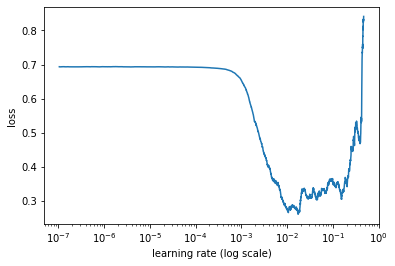

In [10]:
learner.lr_find()
learner.lr_plot()

In [11]:
learner.autofit(0.005, 2)



begin training using triangular learning rate policy with max lr of 0.005...
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 6s 233us/step - loss: 0.5778 - acc: 0.7344 - val_loss: 0.4304 - val_acc: 0.8544
Epoch 2/2
25000/25000 [==============================] - 6s 235us/step - loss: 0.3212 - acc: 0.8869 - val_loss: 0.3050 - val_acc: 0.8854
